### Deliverable 1 - Data Cleaning and Preparation
BANA 785 <br>
Christine Dorward, Adit Shetty, Mind Tienpasertkij

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px

In [2]:
## Mind's Directory
mydir = "/Users/ptienpasertkij/Documents/RIT/Summer 2021/BANA785/All Data Files/"
## Adit's Directory
## mydir = **INSERT DIRECTORY**
## Christine's Directory
##mydir = "C:/users/chrdo/Downloads/"

customerData = mydir + "Wegmans Customer Data.csv"
itemData = mydir + "Wegmans Item Data.csv"
salesData = mydir + "Wegmans Sales Data.csv"
locationData = mydir + "Wegmans Location Data.csv"
customer = pd.read_csv(customerData)
item = pd.read_csv(itemData)
sales = pd.read_csv(salesData)
location = pd.read_csv(locationData)

#### Customer Dataset

In [3]:
customer

,CUSTOMER_ID,HOUSEHOLD_ID,HOH_AGE,HH_INCOME,HH_CHILDREN
0,2767,2767,106.0,100K-125K,0.0
1,4111,4111,58.0,30K-40K,1.0
2,655,655,67.0,NaN,NaN
3,1999,1999,NaN,NaN,NaN
4,1423,1423,79.0,30K-40K,1.0
...,...,...,...,...,...
7043,2065,2065,35.0,<10K,2.0
7044,4753,1187,50.0,30K-40K,1.0
7045,5905,3514,57.0,40K-50K,0.0
7046,5713,1114,62.0,30K-40K,2.0


#### Things to do:
- Examine the data types
- Look at unique values in HH_INCOME and changing the format of the data
    - Use the lower end of the range as the value
    - EX: <10K -> 10000; 15K-20K -> 15000; 20K-30K -> 20000, so on
- Change HH_INCOME to numeric variable for further analysis purpose
- Deal with NaN values in HOH_AGE, HH_INCOME, HH_CHILDREN columns
    - Without NA version
        - drop rows with NA values
    - With NA version
        - use median for HOH_AGE
            - Chose median based on some research on whether to use mean/median for age
            - Outliers can mess with future data analysis
            - Sources
                - https://stats.stackexchange.com/questions/2547/why-is-median-age-a-better-statistic-than-mean-age
        - use mean for HH_INCOME
            - Chose mean after plotting a boxplot - there are no outliers in the dataset
        - use median for HH_CHILDREN
            - Chose median so outliers can't affect our future analysis
- Export datasets into CSV
    - Wegmans Customer Data without NA.csv
    - Wegmans Customer Data with NA.csv

In [4]:
customer.dtypes

CUSTOMER_ID       int64
HOUSEHOLD_ID      int64
HOH_AGE         float64
HH_INCOME        object
HH_CHILDREN     float64
dtype: object

In [5]:
print("\nCount total NaN at each column in Customer dataset:\n", customer.isnull().sum())

print("\nPercent of total rows with NaN for HOH_AGE Column: ", 
      round((customer['HOH_AGE'].isnull().sum()/len(customer))*100,2), "%")
print("Percent of total rows with NaN for HH_INCOME Column: ", 
      round((customer['HH_INCOME'].isnull().sum()/len(customer))*100,2), "%")
print("Percent of total rows with NaN for HH_CHILDREN Column: ", 
      round((customer['HH_CHILDREN'].isnull().sum()/len(customer))*100,2), "%")


Count total NaN at each column in Customer dataset:
 CUSTOMER_ID       0
HOUSEHOLD_ID      0
HOH_AGE         340
HH_INCOME       665
HH_CHILDREN     916
dtype: int64

Percent of total rows with NaN for HOH_AGE Column:  4.82 %
Percent of total rows with NaN for HH_INCOME Column:  9.44 %
Percent of total rows with NaN for HH_CHILDREN Column:  13.0 %


In [6]:
customer['HH_INCOME'].unique()

array(['100K-125K', '30K-40K', nan, '40K-50K', '125K+', '50K-75K',
       '75K-100K', '15K-20K', '20K-30K', '<10K'], dtype=object)

In [7]:
customer.loc[customer['HH_INCOME'] == '<10K', 'HH_INCOME'] = 10000
customer.loc[customer['HH_INCOME'] == '15K-20K', 'HH_INCOME'] = 15000
customer.loc[customer['HH_INCOME'] == '20K-30K', 'HH_INCOME'] = 20000
customer.loc[customer['HH_INCOME'] == '30K-40K', 'HH_INCOME'] = 30000
customer.loc[customer['HH_INCOME'] == '40K-50K', 'HH_INCOME'] = 40000
customer.loc[customer['HH_INCOME'] == '50K-75K', 'HH_INCOME'] = 50000
customer.loc[customer['HH_INCOME'] == '75K-100K', 'HH_INCOME'] = 75000
customer.loc[customer['HH_INCOME'] == '100K-125K', 'HH_INCOME'] = 100000
customer.loc[customer['HH_INCOME'] == '125K+', 'HH_INCOME'] = 125000
customer['HH_INCOME'].unique()

array([100000, 30000, nan, 40000, 125000, 50000, 75000, 15000, 20000,
       10000], dtype=object)

In [8]:
customer["HH_INCOME"] = pd.to_numeric(customer["HH_INCOME"])
customer.dtypes

CUSTOMER_ID       int64
HOUSEHOLD_ID      int64
HOH_AGE         float64
HH_INCOME       float64
HH_CHILDREN     float64
dtype: object

In [9]:
customerWithoutNA = customer.dropna()
customerWithoutNA

,CUSTOMER_ID,HOUSEHOLD_ID,HOH_AGE,HH_INCOME,HH_CHILDREN
0,2767,2767,106.0,100000.0,0.0
1,4111,4111,58.0,30000.0,1.0
4,1423,1423,79.0,30000.0,1.0
5,4687,3801,63.0,100000.0,1.0
6,6415,1244,49.0,40000.0,1.0
...,...,...,...,...,...
7040,2449,2449,41.0,30000.0,0.0
7043,2065,2065,35.0,10000.0,2.0
7044,4753,1187,50.0,30000.0,1.0
7045,5905,3514,57.0,40000.0,0.0


In [10]:
customerWithoutNA.to_csv('Wegmans Customer Data without NA.csv', index=False)

In [11]:
customer.agg({"HOH_AGE": ["min", "max", "median", "mean"],
             "HH_INCOME": ["min", "max", "median", "mean"],
             "HH_CHILDREN": ["min", "max", "median", "mean"],})

,HOH_AGE,HH_INCOME,HH_CHILDREN
min,18.000000,10000.000000,0.000000
max,109.000000,125000.000000,6.000000
median,56.000000,50000.000000,1.000000
mean,55.118068,66348.112173,0.893673


In [12]:
## Copy Customer Dataset to Replace Missing Values
customerWithNA = customer.copy()

<AxesSubplot:>

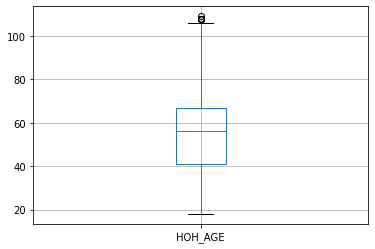

In [13]:
customer.boxplot(column=['HOH_AGE'])

There are outliers in the HOH_AGE column. Therefore, we decided to use median to replace NA values. The outliers could affect our future analysis if we use mean to replace NA values.

<AxesSubplot:>

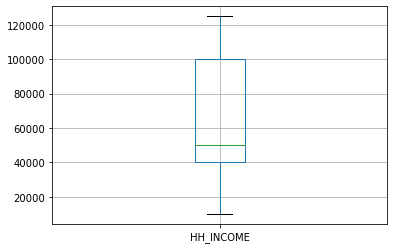

In [14]:
customer.boxplot(column=['HH_INCOME'])

There are no outliers in the HH_INCOME column. Therefore, we decided to use mean to replace NA values.

<AxesSubplot:>

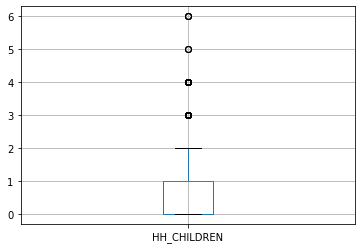

In [15]:
customer.boxplot(column=['HH_CHILDREN'])

There are outliers in the HH_CHILDREN column. Therefore, we decided to use median to replace NA values. The outliers could affect our future analysis if we use mean to replace NA values.

In [16]:
customerWithNA['HOH_AGE'].fillna(value=customerWithNA['HOH_AGE'].median(), inplace=True)
customerWithNA['HH_INCOME'].fillna(value=round(customerWithNA['HH_INCOME'].mean(),2), inplace=True)
customerWithNA['HH_CHILDREN'].fillna(value=customerWithNA['HH_CHILDREN'].median(), inplace=True)

In [17]:
customerWithNA

,CUSTOMER_ID,HOUSEHOLD_ID,HOH_AGE,HH_INCOME,HH_CHILDREN
0,2767,2767,106.0,100000.00,0.0
1,4111,4111,58.0,30000.00,1.0
2,655,655,67.0,66348.11,1.0
3,1999,1999,56.0,66348.11,1.0
4,1423,1423,79.0,30000.00,1.0
...,...,...,...,...,...
7043,2065,2065,35.0,10000.00,2.0
7044,4753,1187,50.0,30000.00,1.0
7045,5905,3514,57.0,40000.00,0.0
7046,5713,1114,62.0,30000.00,2.0


In [18]:
customerWithNA.to_csv('Wegmans Customer Data with NA Replaced.csv', index=False)

#### Item Dataset

In [19]:
item

,ITEM_NBR,ITEM_DESCRIPTION,PRODUCT_HIERARCHY,DEPARTMENT_NAME,CATEGORY_NAME,CLASS_NAME,IS_ORGANIC,IS_FAMILYPACK,IS_WEGMANSBRAND
0,332005,ARR-CENTERPIECE W 3 CANDL 1 EA,42-60-02,FLORAL,ARRANGEMENTS,FOAM ARRANGEMENTS,0,0,1
1,424488,"Scunci U Got This Upzing, Double Combs 1 EA",18-13-25,HEALTH & BEAUTY CARE,HAIR ACCESSORIES,FASHION ACCESSORIES,0,0,0
2,213936,Signature Bouquet 1 EA,42-30-01,FLORAL,BOUQUETS,FRESH BOUQUETS,0,0,1
3,336252,"Yoplait Original Yogurt, Low Fat, Harvest Peac...",40-10-30,CULTURED DAIRY,YOGURT,BLENDED YOGURT,0,0,0
4,596609,papyTissue 8 CT,45-20-40,CARD DEPARTMENT,CARD SHOP GIFT WRAP,TISSUE PAPER,0,0,0
...,...,...,...,...,...,...,...,...,...
87248,37028,"Wegmans Cheese, Sharp Cheddar, Shredded, FAMI...",02-17-10,DAIRY,SHREDDED CHEESE,TRADITIONAL SHREDDED CHEESE,0,1,1
87249,2816,Altman's Lunch Herring 13 OZ,02-70-02,DAIRY,KOSHER DAIRY,HERRING/SEAFOOD,0,0,0
87250,28954,"Organic Cherry Tomato 4"" 1 EA",03-01-18,PRODUCE,WEGMANS ORGANIC FARM,WOF LIVE PLANTS,1,0,1
87251,16411,"Wegmans Organic Spinach & Spring Mix, FAMILY P...",03-13-42,PRODUCE,SALADS AND SALAD KITS,ORG SALAD BLENDS,1,1,1


### Things to do:
- Examine the data types
- Identify any columns with NA values

There weren't any NA values. This dataset is good to go!

In [20]:
item.dtypes

ITEM_NBR              int64
ITEM_DESCRIPTION     object
PRODUCT_HIERARCHY    object
DEPARTMENT_NAME      object
CATEGORY_NAME        object
CLASS_NAME           object
IS_ORGANIC            int64
IS_FAMILYPACK         int64
IS_WEGMANSBRAND       int64
dtype: object

In [21]:
print(" \nCount total NaN at each column in Item dataset: \n",
      item.isnull().sum())

 
Count total NaN at each column in Item dataset: 
 ITEM_NBR             0
ITEM_DESCRIPTION     0
PRODUCT_HIERARCHY    0
DEPARTMENT_NAME      0
CATEGORY_NAME        0
CLASS_NAME           0
IS_ORGANIC           0
IS_FAMILYPACK        0
IS_WEGMANSBRAND      0
dtype: int64


#### Sales + Location Dataset

In [22]:
sales

,TRANSACTION_KEY,DATE_KEY,CUSTOMER_ID,ITEM_NBR,UNITS,WEIGHT,SALES
0,-3159569380792161759,7/21/19,96,45177,1,0.0,0.24
1,-3159569380792161759,7/21/19,96,607378,1,0.0,0.86
2,8384649611398879621,1/20/19,590,36353,1,0.0,7.19
3,2162207011784361973,11/7/19,1807,12663,1,0.0,1.43
4,121169808038836155,3/20/19,1832,125639,1,0.0,0.71
...,...,...,...,...,...,...,...
1048570,-3294459774902307625,10/16/20,6682,43637,1,0.0,1.43
1048571,778889545366320440,12/8/20,3885,814129,1,0.0,0.66
1048572,8853076735561580105,5/1/19,2448,580573,1,0.0,4.31
1048573,-963755514588828062,5/1/20,696,10259,1,0.0,2.15


In [23]:
location

,TRANSACTION_KEY,LOCATION_NBR,INSTACART_IND
0,2690500712181362657,22,1
1,-8773936045043192608,63,1
2,-3661439005258676194,24,1
3,-4733295291706551970,25,1
4,6272747967003556830,20,1
...,...,...,...
441375,-1749134637415514696,24,0
441376,4577840945846652328,25,0
441377,-5971732586820603428,24,0
441378,3009082540181272219,24,0


#### Things to do:
- Examine the data types
- Identify any columns with NA values
- Merge location and sales datasets by TRANSACTION_KEY

There weren't any NA values in this dataset. All we had to do was merging location and sales dataset on TRANSACTION_KEY column.

In [24]:
sales.dtypes

TRANSACTION_KEY      int64
DATE_KEY            object
CUSTOMER_ID          int64
ITEM_NBR             int64
UNITS                int64
WEIGHT             float64
SALES              float64
dtype: object

In [25]:
location.dtypes

TRANSACTION_KEY    int64
LOCATION_NBR       int64
INSTACART_IND      int64
dtype: object

In [26]:
print(" \nCount total NaN at each column in Sales dataset: \n",
      sales.isnull().sum())
print(" \nCount total NaN at each column in Location dataset: \n",
      location.isnull().sum())

 
Count total NaN at each column in Sales dataset: 
 TRANSACTION_KEY    0
DATE_KEY           0
CUSTOMER_ID        0
ITEM_NBR           0
UNITS              0
WEIGHT             0
SALES              0
dtype: int64
 
Count total NaN at each column in Location dataset: 
 TRANSACTION_KEY    0
LOCATION_NBR       0
INSTACART_IND      0
dtype: int64


In [27]:
salesLocation = pd.merge(sales, location, on="TRANSACTION_KEY")
salesLocation

,TRANSACTION_KEY,DATE_KEY,CUSTOMER_ID,ITEM_NBR,UNITS,WEIGHT,SALES,LOCATION_NBR,INSTACART_IND
0,-3159569380792161759,7/21/19,96,45177,1,0.0,0.24,68,0
1,-3159569380792161759,7/21/19,96,607378,1,0.0,0.86,68,0
2,-3159569380792161759,7/21/19,96,124363,1,0.0,1.29,68,0
3,-3159569380792161759,7/21/19,96,616770,1,0.0,2.87,68,0
4,-3159569380792161759,7/21/19,96,172983,1,0.0,2.15,68,0
...,...,...,...,...,...,...,...,...,...
1048570,-445987964229448009,12/9/19,4066,629915,1,0.0,3.59,3,0
1048571,7453292585493501463,10/3/19,2187,44554,1,0.0,0.93,22,0
1048572,-343820635285372653,10/22/20,481,92239,1,0.0,1.79,13,0
1048573,4437606063527501392,10/8/19,155,410339,0,0.0,0.00,63,0


In [28]:
sales.to_csv('Wegmans Sales Location.csv', index=False)

#### Merging Data

In [29]:
salesItem = pd.merge(salesLocation, item, on="ITEM_NBR")
salesItem

,TRANSACTION_KEY,DATE_KEY,CUSTOMER_ID,ITEM_NBR,UNITS,WEIGHT,SALES,LOCATION_NBR,INSTACART_IND,ITEM_DESCRIPTION,PRODUCT_HIERARCHY,DEPARTMENT_NAME,CATEGORY_NAME,CLASS_NAME,IS_ORGANIC,IS_FAMILYPACK,IS_WEGMANSBRAND
0,-3159569380792161759,7/21/19,96,45177,1,0.0,0.24,68,0,"Wegmans Lowfat Blended Yogurt, Lemon 6 OZ",40-10-30,CULTURED DAIRY,YOGURT,BLENDED YOGURT,0,0,1
1,2964557372677007630,7/29/20,1737,45177,2,0.0,0.48,24,0,"Wegmans Lowfat Blended Yogurt, Lemon 6 OZ",40-10-30,CULTURED DAIRY,YOGURT,BLENDED YOGURT,0,0,1
2,-8818458431181685485,12/8/19,2745,45177,2,0.0,0.48,24,0,"Wegmans Lowfat Blended Yogurt, Lemon 6 OZ",40-10-30,CULTURED DAIRY,YOGURT,BLENDED YOGURT,0,0,1
3,4948623861203185012,3/9/19,3963,45177,2,0.0,0.48,74,0,"Wegmans Lowfat Blended Yogurt, Lemon 6 OZ",40-10-30,CULTURED DAIRY,YOGURT,BLENDED YOGURT,0,0,1
4,-347535057361443400,10/17/20,188,45177,1,0.0,0.24,11,0,"Wegmans Lowfat Blended Yogurt, Lemon 6 OZ",40-10-30,CULTURED DAIRY,YOGURT,BLENDED YOGURT,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048570,937954173833287248,7/10/19,2522,752946,1,0.0,13.67,18,0,SINGLECUT Softly Spoken Magic Spells 4/16 oz...,51-40-10,BEER & WINE COOLERS,CRAFT BEER,CRAFT 6 PACKS,0,0,0
1048571,544224609312636175,6/7/19,3471,566437,1,0.0,5.72,22,0,Papyrus greeting Card* 1 EA,45-10-15,CARD DEPARTMENT,GREETING CARDS,EVERYDAY CARDS: ALTERNT VENDOR,0,0,0
1048572,-5585646561555871484,3/10/20,6661,801183,3,0.0,8.62,3,0,"26"" Grn Ball Flower Stem 1 EA",82-05-06,GM SEASONAL MERCHANDISE,SEASONAL & HOLIDAY DECORATIONS,SPRING FLORAL DECOR,0,0,0
1048573,-316537679601839658,8/23/20,3239,762840,1,0.0,4.31,24,0,Wind Up Diver Toy 1 EA,10-90-08,GM BASIC PRODUCTS DEPARTMENT,TOYS & GAMES,TOYSMITH TOYS,0,0,0


In [30]:
salesItem.to_csv('Wegmans Sales Item.csv', index=False)

In [31]:
salesCustomers = pd.merge(salesLocation, customerWithoutNA, on="CUSTOMER_ID")
salesCustomers

,TRANSACTION_KEY,DATE_KEY,CUSTOMER_ID,ITEM_NBR,UNITS,WEIGHT,SALES,LOCATION_NBR,INSTACART_IND,HOUSEHOLD_ID,HOH_AGE,HH_INCOME,HH_CHILDREN
0,-3159569380792161759,7/21/19,96,45177,1,0.0,0.24,68,0,96,67.0,75000.0,0.0
1,-3159569380792161759,7/21/19,96,607378,1,0.0,0.86,68,0,96,67.0,75000.0,0.0
2,-3159569380792161759,7/21/19,96,124363,1,0.0,1.29,68,0,96,67.0,75000.0,0.0
3,-3159569380792161759,7/21/19,96,616770,1,0.0,2.87,68,0,96,67.0,75000.0,0.0
4,-3159569380792161759,7/21/19,96,172983,1,0.0,2.15,68,0,96,67.0,75000.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
994937,-5025129088482420806,12/23/20,5568,781876,0,0.0,1.08,67,0,1467,38.0,50000.0,0.0
994938,8365859189097857006,6/21/19,3252,508571,1,0.0,2.51,64,0,3252,71.0,75000.0,0.0
994939,5015039875098906343,3/3/20,5633,390234,1,0.0,9.35,65,1,2336,29.0,75000.0,2.0
994940,5015039875098906343,3/3/20,5633,68773,1,0.0,1.79,65,1,2336,29.0,75000.0,2.0


In [32]:
salesCustomers.to_csv('Wegmans Sales Customer.csv', index=False)

In [33]:
salesCustomersFull = pd.merge(salesLocation, customerWithNA, on="CUSTOMER_ID")
salesCustomersFull

,TRANSACTION_KEY,DATE_KEY,CUSTOMER_ID,ITEM_NBR,UNITS,WEIGHT,SALES,LOCATION_NBR,INSTACART_IND,HOUSEHOLD_ID,HOH_AGE,HH_INCOME,HH_CHILDREN
0,-3159569380792161759,7/21/19,96,45177,1,0.0,0.24,68,0,96,67.0,75000.00,0.0
1,-3159569380792161759,7/21/19,96,607378,1,0.0,0.86,68,0,96,67.0,75000.00,0.0
2,-3159569380792161759,7/21/19,96,124363,1,0.0,1.29,68,0,96,67.0,75000.00,0.0
3,-3159569380792161759,7/21/19,96,616770,1,0.0,2.87,68,0,96,67.0,75000.00,0.0
4,-3159569380792161759,7/21/19,96,172983,1,0.0,2.15,68,0,96,67.0,75000.00,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048570,5015039875098906343,3/3/20,5633,390234,1,0.0,9.35,65,1,2336,29.0,75000.00,2.0
1048571,5015039875098906343,3/3/20,5633,68773,1,0.0,1.79,65,1,2336,29.0,75000.00,2.0
1048572,-3802740645276376728,3/2/20,5633,559644,1,0.0,6.47,65,1,2336,29.0,75000.00,2.0
1048573,8063107500341945991,11/6/19,364,540220,1,0.0,1.80,66,0,364,71.0,66348.11,1.0


In [34]:
salesCustomersFull.to_csv('Wegmans Sales Customer Full.csv', index=False)

In [35]:
allData = pd.merge(salesItem, customerWithoutNA, on="CUSTOMER_ID")
allData

,TRANSACTION_KEY,DATE_KEY,CUSTOMER_ID,ITEM_NBR,UNITS,WEIGHT,SALES,LOCATION_NBR,INSTACART_IND,ITEM_DESCRIPTION,...,DEPARTMENT_NAME,CATEGORY_NAME,CLASS_NAME,IS_ORGANIC,IS_FAMILYPACK,IS_WEGMANSBRAND,HOUSEHOLD_ID,HOH_AGE,HH_INCOME,HH_CHILDREN
0,-3159569380792161759,7/21/19,96,45177,1,0.00,0.24,68,0,"Wegmans Lowfat Blended Yogurt, Lemon 6 OZ",...,CULTURED DAIRY,YOGURT,BLENDED YOGURT,0,0,1,96,67.0,75000.0,0.0
1,8106217537813291443,7/28/19,96,45177,1,0.00,0.24,68,0,"Wegmans Lowfat Blended Yogurt, Lemon 6 OZ",...,CULTURED DAIRY,YOGURT,BLENDED YOGURT,0,0,1,96,67.0,75000.0,0.0
2,4744706893461331626,3/22/20,96,45177,1,0.00,0.24,68,0,"Wegmans Lowfat Blended Yogurt, Lemon 6 OZ",...,CULTURED DAIRY,YOGURT,BLENDED YOGURT,0,0,1,96,67.0,75000.0,0.0
3,8647152740526880532,3/3/19,96,45177,1,0.00,0.24,68,0,"Wegmans Lowfat Blended Yogurt, Lemon 6 OZ",...,CULTURED DAIRY,YOGURT,BLENDED YOGURT,0,0,1,96,67.0,75000.0,0.0
4,-6081800986339541485,1/20/19,96,45177,1,0.00,0.36,68,0,"Wegmans Lowfat Blended Yogurt, Lemon 6 OZ",...,CULTURED DAIRY,YOGURT,BLENDED YOGURT,0,0,1,96,67.0,75000.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
994937,-835397730634370950,2/14/19,6594,509063,1,0.00,18.00,3,0,Valentine's Day Signature Bouquet 1 EA,...,FLORAL,BOUQUETS,FRESH BOUQUETS,0,0,1,1505,39.0,75000.0,1.0
994938,7817171004940613028,8/8/19,6375,596801,-1,0.00,-2.58,3,0,"U Create Construction Paper, Assorted Colors ...",...,GM BASIC PRODUCTS DEPARTMENT,CRAFT SUPPLIES,ART PAPER,0,0,0,2051,34.0,20000.0,1.0
994939,1609074110777367327,11/30/19,5804,794857,1,0.33,1.43,11,0,JV MC Coffee Beans 1 LB,...,BULK FOODS,CHOCOLATES,UNWRAPPED CHOCOLATES,0,0,1,2219,58.0,100000.0,0.0
994940,-6261128042583831545,1/7/19,6270,704418,1,0.00,0.36,12,0,Tartan lunch napkin 16 CT,...,GM SEASONAL MERCHANDISE,SEASONAL &HOLIDAY PARTY SUPPLY,PARTY SUPPLIES: CHRISTMAS,0,0,0,3248,73.0,50000.0,1.0


In [36]:
allData.to_csv('Wegmans All Data.csv', index=False)

In [37]:
allDataFull = pd.merge(salesItem, customerWithNA, on="CUSTOMER_ID")
allDataFull

,TRANSACTION_KEY,DATE_KEY,CUSTOMER_ID,ITEM_NBR,UNITS,WEIGHT,SALES,LOCATION_NBR,INSTACART_IND,ITEM_DESCRIPTION,...,DEPARTMENT_NAME,CATEGORY_NAME,CLASS_NAME,IS_ORGANIC,IS_FAMILYPACK,IS_WEGMANSBRAND,HOUSEHOLD_ID,HOH_AGE,HH_INCOME,HH_CHILDREN
0,-3159569380792161759,7/21/19,96,45177,1,0.00,0.24,68,0,"Wegmans Lowfat Blended Yogurt, Lemon 6 OZ",...,CULTURED DAIRY,YOGURT,BLENDED YOGURT,0,0,1,96,67.0,75000.00,0.0
1,8106217537813291443,7/28/19,96,45177,1,0.00,0.24,68,0,"Wegmans Lowfat Blended Yogurt, Lemon 6 OZ",...,CULTURED DAIRY,YOGURT,BLENDED YOGURT,0,0,1,96,67.0,75000.00,0.0
2,4744706893461331626,3/22/20,96,45177,1,0.00,0.24,68,0,"Wegmans Lowfat Blended Yogurt, Lemon 6 OZ",...,CULTURED DAIRY,YOGURT,BLENDED YOGURT,0,0,1,96,67.0,75000.00,0.0
3,8647152740526880532,3/3/19,96,45177,1,0.00,0.24,68,0,"Wegmans Lowfat Blended Yogurt, Lemon 6 OZ",...,CULTURED DAIRY,YOGURT,BLENDED YOGURT,0,0,1,96,67.0,75000.00,0.0
4,-6081800986339541485,1/20/19,96,45177,1,0.00,0.36,68,0,"Wegmans Lowfat Blended Yogurt, Lemon 6 OZ",...,CULTURED DAIRY,YOGURT,BLENDED YOGURT,0,0,1,96,67.0,75000.00,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048570,7817171004940613028,8/8/19,6375,596801,-1,0.00,-2.58,3,0,"U Create Construction Paper, Assorted Colors ...",...,GM BASIC PRODUCTS DEPARTMENT,CRAFT SUPPLIES,ART PAPER,0,0,0,2051,34.0,20000.00,1.0
1048571,1609074110777367327,11/30/19,5804,794857,1,0.33,1.43,11,0,JV MC Coffee Beans 1 LB,...,BULK FOODS,CHOCOLATES,UNWRAPPED CHOCOLATES,0,0,1,2219,58.0,100000.00,0.0
1048572,-6261128042583831545,1/7/19,6270,704418,1,0.00,0.36,12,0,Tartan lunch napkin 16 CT,...,GM SEASONAL MERCHANDISE,SEASONAL &HOLIDAY PARTY SUPPLY,PARTY SUPPLIES: CHRISTMAS,0,0,0,3248,73.0,50000.00,1.0
1048573,-5532141964044281705,2/16/19,4549,749141,1,0.00,6.83,68,0,Blue Point Brewing Company Citrus Plunge IPA ...,...,BEER & WINE COOLERS,CRAFT BEER,CRAFT 6 PACKS,0,0,0,3316,63.0,125000.00,1.0


In [38]:
allDataFull.to_csv('Wegmans All Data Full.csv', index=False)

#### EDA

In [39]:
wegmansData = mydir + "Wegmans All Data Full.csv"
wegmansAll = pd.read_csv(wegmansData)

In [40]:
wegmansAll

,TRANSACTION_KEY,DATE_KEY,CUSTOMER_ID,ITEM_NBR,UNITS,WEIGHT,SALES,LOCATION_NBR,INSTACART_IND,ITEM_DESCRIPTION,...,DEPARTMENT_NAME,CATEGORY_NAME,CLASS_NAME,IS_ORGANIC,IS_FAMILYPACK,IS_WEGMANSBRAND,HOUSEHOLD_ID,HOH_AGE,HH_INCOME,HH_CHILDREN
0,-3159569380792161759,7/21/19,96,45177,1,0.00,0.24,68,0,"Wegmans Lowfat Blended Yogurt, Lemon 6 OZ",...,CULTURED DAIRY,YOGURT,BLENDED YOGURT,0,0,1,96,67.0,75000.00,0.0
1,8106217537813291443,7/28/19,96,45177,1,0.00,0.24,68,0,"Wegmans Lowfat Blended Yogurt, Lemon 6 OZ",...,CULTURED DAIRY,YOGURT,BLENDED YOGURT,0,0,1,96,67.0,75000.00,0.0
2,4744706893461331626,3/22/20,96,45177,1,0.00,0.24,68,0,"Wegmans Lowfat Blended Yogurt, Lemon 6 OZ",...,CULTURED DAIRY,YOGURT,BLENDED YOGURT,0,0,1,96,67.0,75000.00,0.0
3,8647152740526880532,3/3/19,96,45177,1,0.00,0.24,68,0,"Wegmans Lowfat Blended Yogurt, Lemon 6 OZ",...,CULTURED DAIRY,YOGURT,BLENDED YOGURT,0,0,1,96,67.0,75000.00,0.0
4,-6081800986339541485,1/20/19,96,45177,1,0.00,0.36,68,0,"Wegmans Lowfat Blended Yogurt, Lemon 6 OZ",...,CULTURED DAIRY,YOGURT,BLENDED YOGURT,0,0,1,96,67.0,75000.00,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048570,7817171004940613028,8/8/19,6375,596801,-1,0.00,-2.58,3,0,"U Create Construction Paper, Assorted Colors ...",...,GM BASIC PRODUCTS DEPARTMENT,CRAFT SUPPLIES,ART PAPER,0,0,0,2051,34.0,20000.00,1.0
1048571,1609074110777367327,11/30/19,5804,794857,1,0.33,1.43,11,0,JV MC Coffee Beans 1 LB,...,BULK FOODS,CHOCOLATES,UNWRAPPED CHOCOLATES,0,0,1,2219,58.0,100000.00,0.0
1048572,-6261128042583831545,1/7/19,6270,704418,1,0.00,0.36,12,0,Tartan lunch napkin 16 CT,...,GM SEASONAL MERCHANDISE,SEASONAL &HOLIDAY PARTY SUPPLY,PARTY SUPPLIES: CHRISTMAS,0,0,0,3248,73.0,50000.00,1.0
1048573,-5532141964044281705,2/16/19,4549,749141,1,0.00,6.83,68,0,Blue Point Brewing Company Citrus Plunge IPA ...,...,BEER & WINE COOLERS,CRAFT BEER,CRAFT 6 PACKS,0,0,0,3316,63.0,125000.00,1.0


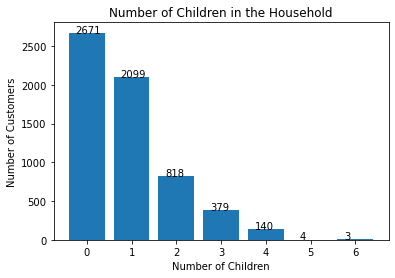

In [42]:
x_children = customerWithoutNA['HH_CHILDREN'].value_counts().index
y_children = customerWithoutNA['HH_CHILDREN'].value_counts().values

plt.bar(x_children,y_children)

def addlabels(x,y):
    for i in range(len(x)):
        plt.text((i-.25),y[i],y[i])
        
addlabels(x_children, y_children)

plt.title("Number of Children in the Household")

plt.xlabel("Number of Children")
plt.ylabel("Number of Customers")

plt.show()

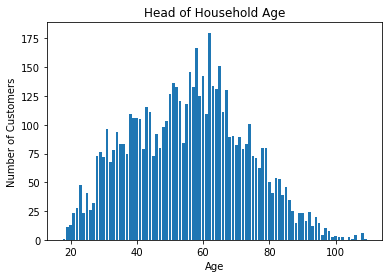

In [43]:
x_age = customerWithoutNA['HOH_AGE'].value_counts().index
y_age = customerWithoutNA['HOH_AGE'].value_counts().values

plt.bar(x_age,y_age)

plt.title("Head of Household Age")

plt.xlabel("Age")
plt.ylabel("Number of Customers")

plt.show()

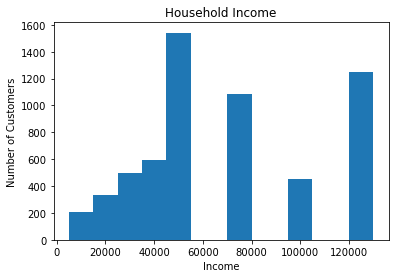

In [44]:
x_income = customerWithoutNA['HH_INCOME'].value_counts().index
y_income = customerWithoutNA['HH_INCOME'].value_counts().values

plt.bar(x_income,y_income,10000)

plt.title("Household Income")

plt.xlabel("Income")
plt.ylabel("Number of Customers")

plt.show()

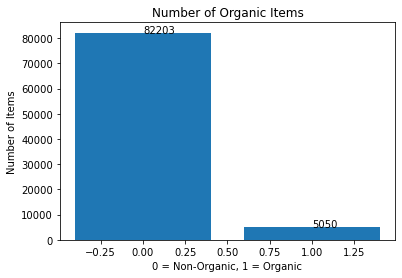

In [45]:
x_organic = item['IS_ORGANIC'].value_counts().index
y_organic = item['IS_ORGANIC'].value_counts().values

plt.bar(x_organic,y_organic)

def addlabels(x,y):
    for i in range(len(x)):
        plt.text(i,y[i],y[i])
        
addlabels(x_organic, y_organic)

plt.title("Number of Organic Items")

plt.xlabel("0 = Non-Organic, 1 = Organic")
plt.ylabel("Number of Items")

plt.show()

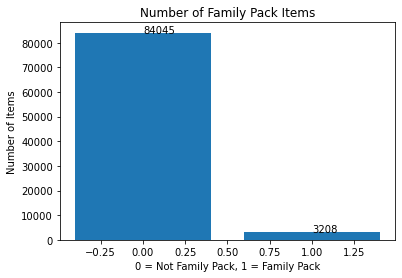

In [46]:
x_familypack = item['IS_FAMILYPACK'].value_counts().index
y_familypack = item['IS_FAMILYPACK'].value_counts().values

plt.bar(x_familypack,y_familypack)

def addlabels(x,y):
    for i in range(len(x)):
        plt.text(i,y[i],y[i])
        
addlabels(x_familypack, y_familypack)

plt.title("Number of Family Pack Items")

plt.xlabel("0 = Not Family Pack, 1 = Family Pack")
plt.ylabel("Number of Items")

plt.show()

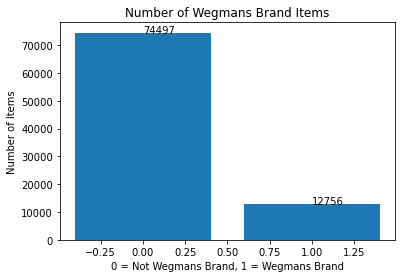

In [47]:
x_wegmansbrand = item['IS_WEGMANSBRAND'].value_counts().index
y_wegmansbrand = item['IS_WEGMANSBRAND'].value_counts().values

plt.bar(x_wegmansbrand,y_wegmansbrand)

def addlabels(x,y):
    for i in range(len(x)):
        plt.text(i,y[i],y[i])
        
addlabels(x_wegmansbrand, y_wegmansbrand)

plt.title("Number of Wegmans Brand Items")

plt.xlabel("0 = Not Wegmans Brand, 1 = Wegmans Brand")
plt.ylabel("Number of Items")

plt.show()

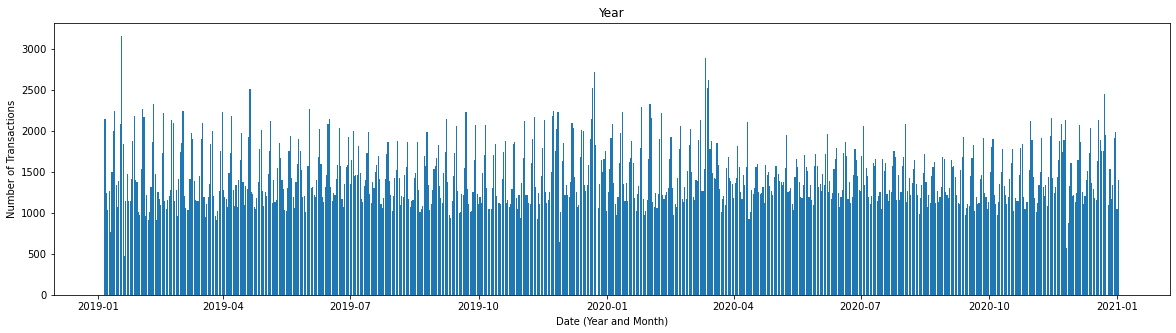

In [48]:
salesLocation["DATE_KEY"] =  pd.to_datetime(salesLocation["DATE_KEY"])
x_date = salesLocation['DATE_KEY'].value_counts().index
y_date = salesLocation['DATE_KEY'].value_counts()

plt.figure(figsize=(20, 5))
plt.bar(x_date,y_date)

plt.title("Year")

plt.xlabel("Date (Year and Month)")
plt.ylabel("Number of Transactions")
plt.show()

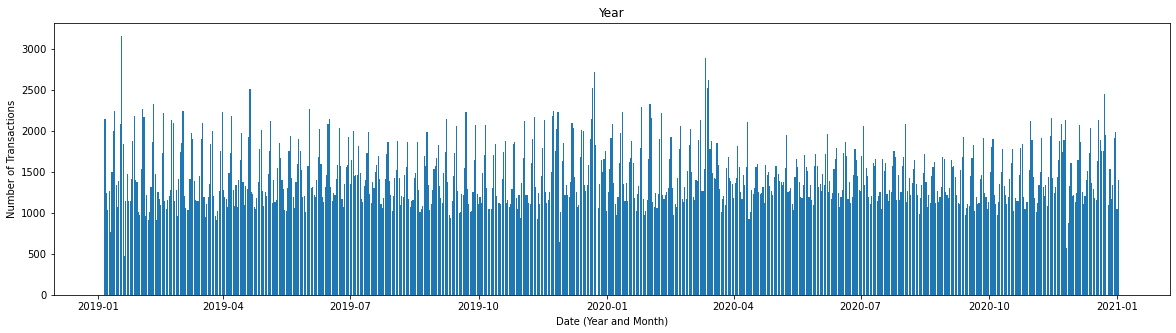

In [49]:
wegmansAll["DATE_KEY"] =  pd.to_datetime(wegmansAll["DATE_KEY"])
x_dateAll = wegmansAll['DATE_KEY'].value_counts().index
y_dateAll = wegmansAll['DATE_KEY'].value_counts()

plt.figure(figsize=(20, 5))
plt.bar(x_dateAll,y_dateAll)

plt.title("Year")

plt.xlabel("Date (Year and Month)")
plt.ylabel("Number of Transactions")
plt.show()

In [50]:
wegmansAll.groupby([pd.to_datetime(wegmansAll["DATE_KEY"]).dt.year, 'IS_ORGANIC'])['DATE_KEY'].count().unstack()

IS_ORGANIC,0,1
DATE_KEY,,
2019,491100,29941
2020,494758,30330
2021,2299,147


In [52]:
wegmansAll.groupby([pd.to_datetime(wegmansAll["DATE_KEY"]).dt.year, 'IS_FAMILYPACK'])['DATE_KEY'].count().unstack()

IS_FAMILYPACK,0,1
DATE_KEY,,
2019,469252,51789
2020,472015,53073
2021,2175,271


In [53]:
wegmansAll.groupby([pd.to_datetime(wegmansAll["DATE_KEY"]).dt.year, 'IS_WEGMANSBRAND'])['DATE_KEY'].count().unstack()

IS_WEGMANSBRAND,0,1
DATE_KEY,,
2019,250385,270656
2020,251737,273351
2021,1158,1288


In [54]:
department = wegmansAll.groupby(['DEPARTMENT_NAME', pd.to_datetime(wegmansAll["DATE_KEY"]).dt.year,
                    pd.to_datetime(wegmansAll["DATE_KEY"]).dt.quarter])['DATE_KEY'].count().unstack()

pd.set_option('display.max_rows', department.shape[0]+1)
print(department)

DATE_KEY                                     1        2        3        4
DEPARTMENT_NAME              DATE_KEY                                    
ASIAN                        2019        173.0    179.0    179.0    214.0
                             2020        169.0    143.0    243.0    252.0
                             2021          4.0      NaN      NaN      NaN
BAKESHOP                     2019       3486.0   4090.0   4319.0   3887.0
                             2020       3915.0   4244.0   4114.0   3781.0
                             2021         74.0      NaN      NaN      NaN
BEER & WINE COOLERS          2019        802.0   1109.0   1269.0   1024.0
                             2020        880.0   1270.0   1290.0   1160.0
                             2021         21.0      NaN      NaN      NaN
BEVERAGE CONTAINER RETURNS   2019       3618.0   4315.0   4550.0   4287.0
                             2020       4026.0   4110.0   4609.0   4208.0
                             2021     

In [55]:
itemDesc = wegmansAll.groupby(['DEPARTMENT_NAME','ITEM_DESCRIPTION',
                               pd.to_datetime(wegmansAll["DATE_KEY"]).dt.year])[['DATE_KEY']].agg(['count'])
itemDesc = itemDesc.sort_values(by=['DEPARTMENT_NAME',('DATE_KEY','count')],ascending=[True,False])
itemDesc = itemDesc.groupby('DEPARTMENT_NAME').head(2)
print(itemDesc)

                                                                                         DATE_KEY
                                                                                            count
DEPARTMENT_NAME              ITEM_DESCRIPTION                                   DATE_KEY         
ASIAN                        Wegmans  Sesame Chicken with Vegetable Lo Mein ... 2019          100
                                                                                2020           90
BAKESHOP                     Wegmans  Giant Bread  22 OZ                        2019         1356
                                                                                2020         1333
BEER & WINE COOLERS          Genesee  Limited Edition Seasonal Beer  12/12 o... 2020          139
                                                                                2019          119
BEVERAGE CONTAINER RETURNS   Pop Deposit (.05) 1 EA                             2019         5574
                    

In [56]:
category = wegmansAll.groupby(['DEPARTMENT_NAME','CATEGORY_NAME',
                               pd.to_datetime(wegmansAll["DATE_KEY"]).dt.year])[['DATE_KEY']].agg(['count'])
category = category.sort_values(by=['DEPARTMENT_NAME',('DATE_KEY','count')],ascending=[True,False])
category = category.groupby('DEPARTMENT_NAME').head(2)
print(category)

                                                                     DATE_KEY
                                                                        count
DEPARTMENT_NAME              CATEGORY_NAME                  DATE_KEY         
ASIAN                        ASIAN PACKAGED                 2020          749
                                                            2019          660
BAKESHOP                     VARIETY BREADS                 2019         5406
                                                            2020         5341
BEER & WINE COOLERS          CRAFT BEER                     2020         1795
                                                            2019         1640
BEVERAGE CONTAINER RETURNS   BEVERAGE CONTAINER DEPOSITS    2020        16184
                                                            2019        15831
BULK FOODS                   CANDY                          2019         1059
                             BULK SNACK NUTS                2019

In [57]:
wegmansAll.groupby(['HH_INCOME', 'IS_ORGANIC'])['IS_ORGANIC'].count().unstack()

IS_ORGANIC,0,1
HH_INCOME,,
10000.00,29072,1352
15000.00,18628,1054
20000.00,47867,2375
30000.00,60780,3448
40000.00,88469,4689
50000.00,267691,14194
66348.11,11899,672
75000.00,170035,10111
100000.00,84369,4739


In [58]:
incomeOrganic = wegmansAll.groupby(['HH_INCOME', 'IS_ORGANIC']).agg({'IS_ORGANIC':'count'})
organicIncome = wegmansAll.groupby(['HH_INCOME']).agg({'IS_ORGANIC':'count'})
incomeOrganic.div(organicIncome, level = 'HH_INCOME') * 100

IS_ORGANIC
HH_INCOME IS_ORGANIC            
10000.00  0            95.556140
          1             4.443860
15000.00  0            94.644853
          1             5.355147
20000.00  0            95.272879
          1             4.727121
30000.00  0            94.631625
          1             5.368375
40000.00  0            94.966616
          1             5.033384
50000.00  0            94.964613
          1             5.035387
66348.11  0            94.654363
          1             5.345637
75000.00  0            94.387330
          1             5.612670
100000.00 0            94.681735
          1             5.318265
125000.00 0            92.170157
          1             7.829843

In [59]:
incomeWegmansBrand = wegmansAll.groupby(['HH_INCOME', 'IS_WEGMANSBRAND']).agg({'IS_WEGMANSBRAND':'count'})
WegmansBrandIncome = wegmansAll.groupby(['HH_INCOME']).agg({'IS_WEGMANSBRAND':'count'})
incomeWegmansBrand.div(WegmansBrandIncome, level = 'HH_INCOME') * 100

IS_WEGMANSBRAND
HH_INCOME IS_WEGMANSBRAND                 
10000.00  0                      50.108467
          1                      49.891533
15000.00  0                      49.065136
          1                      50.934864
20000.00  0                      48.240516
          1                      51.759484
30000.00  0                      48.340288
          1                      51.659712
40000.00  0                      48.490736
          1                      51.509264
50000.00  0                      48.579740
          1                      51.420260
66348.11  0                      47.919815
          1                      52.080185
75000.00  0                      47.591953
          1                      52.408047
100000.00 0                      47.086681
          1                      52.913319
125000.00 0                      47.225610
          1                      52.774390

In [60]:
children = wegmansAll.groupby(['HH_CHILDREN', 'IS_FAMILYPACK']).agg({'IS_FAMILYPACK':'count'})
family = wegmansAll.groupby(['HH_CHILDREN']).agg({'IS_FAMILYPACK':'count'})
children.div(family, level = 'HH_CHILDREN') * 100

IS_FAMILYPACK
HH_CHILDREN IS_FAMILYPACK               
0.0         0                  90.418525
            1                   9.581475
1.0         0                  90.037710
            1                   9.962290
2.0         0                  89.308571
            1                  10.691429
3.0         0                  89.165616
            1                  10.834384
4.0         0                  88.705747
            1                  11.294253
5.0         0                  87.820513
            1                  12.179487
6.0         0                  93.415638
            1                   6.584362